# Regresión Lineal y Logística en Python

Tomás Sánchez Paredes


In [2]:
pip install -U scikit-learn

  Using cached scikit_learn-1.2.1-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.1-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scipy-1.10.0-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\Otros ordenadores\Mi MacBook Air\Desktop\IA y BD\SAA\Tomas_Sanchez-Regresión_Lineal_y_Logistica_en_Python\sklearn-venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\Otros ordenadores\Mi MacBook Air\Desktop\IA y BD\SAA\Tomas_Sanchez-Regresión_Lineal_y_Logistica_en_Python\sklearn-venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install matplotlib

  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached Pillow-9.4.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\Otros ordenadores\Mi MacBook Air\Desktop\IA y BD\SAA\Tomas_Sanchez-Regresión_Lineal_y_Logistica_en_Python\sklearn-venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [72]:
# Importo librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


Cargamos el dataset proporcionado, que contiene diversas URLs a artículos sobre Machine Learning.

In [101]:
articulos = pd.read_csv("articulos_ml.csv")

Primero visualiza los datos del dataset para comprobar que contiene las columnas indicadas. 

In [9]:
articulos.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [10]:
articulos.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Sólo vamos a analizar aquellas líneas que tengan un número de palabras entre 0 y 3.500. 

In [102]:
articulos = articulos[articulos['Word count'] <= 3500]

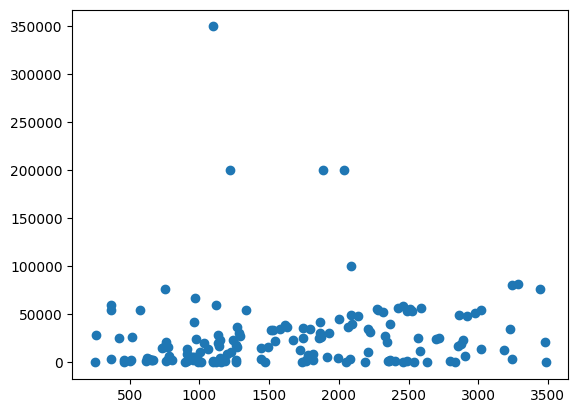

In [103]:
# Represento los datos generados, para ver si son aproximadamente lineales
#  lo hacemos usando el diagrama de puntos o dispersion
plt.scatter(articulos['Word count'], articulos['# Shares'])
plt.show()

In [107]:
# Elimino datos Erroneos que pueden alterar las predicciones
articulos = articulos[articulos['# Shares'] <= 80000]

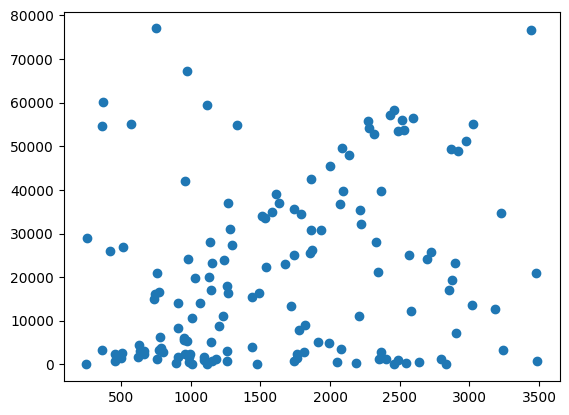

In [108]:
# Represento los datos generados, para ver si son aproximadamente lineales
#  lo hacemos usando el diagrama de puntos o dispersion
plt.scatter(articulos['Word count'], articulos['# Shares'])
plt.show()

 **1. CREAMOS OBJETO MODELO DE REGRESIÓN LINEAL**

In [109]:
#Crear el objeto de regresión lineal
## Creo una instancia modelo de regresión lineal, haciendo uso de la clase de LinearRegression
regr = linear_model.LinearRegression()

 **2. DIVIDIMOS**

In [114]:
#si queremos dividir, tenemos que:
X_train, X_test, y_train, y_test = train_test_split(articulos['Word count'].values, articulos['# Shares'].values)
X_trainData=X_train.reshape((-1,1))
X_testData=X_test.reshape((-1,1))
y_trainData=y_train.reshape((-1,1))
y_testData=y_test.reshape((-1,1))

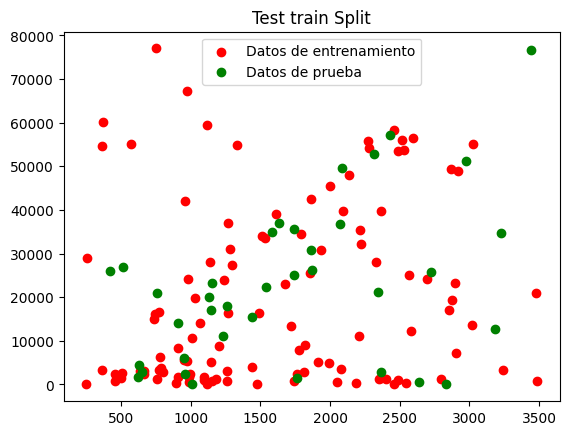

In [115]:
plt.scatter(X_train, y_train, label='Datos de entrenamiento', color='r')
plt.scatter(X_test, y_test, label='Datos de prueba', color='g')
plt.legend()
plt.title("Test train Split")
plt.show()

# los datos en rojo se crean para crear nuestra linea y
# los la linea que una los puntos en verde evaluará nuestro modelo 

 **4. ENTRENAMOS**

In [116]:
#Entrenar el modelo usando los datos de entrenamiento
# esta funcion encuentra la lista optima
regr.fit(X_trainData, y_trainData)


LinearRegression()

**5. REALIZAR PREDICCIONES**

In [123]:
#hacer predicciones con el modelo
y_pred = regr.predict(X_testData)
print(y_pred)


[[26428.36057708]
 [19046.92921693]
 [24340.68302067]
 [17257.49131143]
 [22667.22720165]
 [15666.87983989]
 [17017.24270375]
 [22791.49372286]
 [24804.61136654]
 [19825.6660832 ]
 [25392.80623362]
 [20364.1543418 ]
 [18305.47230701]
 [17771.12626579]
 [18160.49469893]
 [14813.58306088]
 [21635.81507557]
 [15633.74210089]
 [16221.93696798]
 [19457.00873693]
 [20285.4522117 ]
 [17804.26400478]
 [20281.30999432]
 [16830.84292193]
 [23988.5945439 ]
 [19618.55521451]
 [26262.67188213]
 [21722.80164042]
 [15202.95149402]
 [23127.01333014]
 [17033.81157325]
 [22870.19585296]
 [20790.80273131]
 [17833.2595264 ]
 [20819.79825292]
 [27327.2217472 ]
 [15762.15083948]]


In [118]:
# vamos a visualizar todos los atributos del modelo entrenado
regr.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[4.14221737]]),
 'rank_': 1,
 'singular_': array([8577.67031099]),
 'intercept_': array([13069.7095465])}

In [119]:
# Ver los coeficientes
print(regr.coef_)

[[4.14221737]]


Analicemos este resultado:

*Y = mX + b*

m = pendiente = coef_ = coeficiente =  1.94610778
b = término independiente = intercept_ = valor del error = 0.09580838

Sabiendo esto, ya podemos calcular el precio de la vivienda en función de los metros
haciendo uso de la función que obtenemos.

si x = 8
y = 1.94610778*8 + 0.09580838




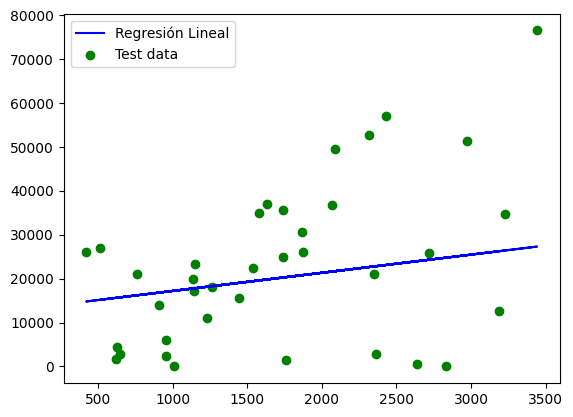

In [120]:
# Representamos el ajuste (rojo) y la recta Y = constante*x (verde)
plt.plot(X_test, y_pred, label="Regresión Lineal", c="b")

plt.scatter(X_test, y_test, label="Test data", c="g")

plt.legend()
plt.show()

In [122]:
# Vamos a predecir cual seria el valor de y para un valor de x de 20
y_pred_2 =regr.predict([[600]]);
print(y_pred_2)


[[15555.03997079]]
